### Lecture 3

During this jupyter notebook we will use the techniques aquires during the first two weeks to use multiple linear regression for predictive tasks. We will find optimal solutions by using the learning descent algorithm and then see a practical overview of OLS estimations.

In [1]:
# If you enconunter a ModuleNotFoundError run: 
# !pip install pandas numpy matplotlib statsmodels


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, math

# For OLS Regression Analysis

import statsmodels.api as sm

In [2]:
# We will stary by loading our kaggle data set

data_path = "./kaggle/train.csv" # This is the path where the data is located
data = pd.read_csv(data_path)
data

# Feel free to have a quick look.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Since some variables have non-numeric values, we will only select the ones that do.
# We select columns that include integers or floats (decimals)

df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.dropna()

In [4]:
x_train = df_num.iloc[:,1:-1]
y_train = df_num['SalePrice']
X_features = x_train.columns
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train)
print(y_train)
                   

[[6.000e+01 6.500e+01 8.450e+03 ... 0.000e+00 2.000e+00 2.008e+03]
 [2.000e+01 8.000e+01 9.600e+03 ... 0.000e+00 5.000e+00 2.007e+03]
 [6.000e+01 6.800e+01 1.125e+04 ... 0.000e+00 9.000e+00 2.008e+03]
 ...
 [7.000e+01 6.600e+01 9.042e+03 ... 2.500e+03 5.000e+00 2.010e+03]
 [2.000e+01 6.800e+01 9.717e+03 ... 0.000e+00 4.000e+00 2.010e+03]
 [2.000e+01 7.500e+01 9.937e+03 ... 0.000e+00 6.000e+00 2.008e+03]]
[208500 181500 223500 ... 266500 142125 147500]


That looks much better! This will mean we will use 35 features to predict the Sale Price


### The function that we are trying to estimate

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$

This means, we have to estimate the $n+1$ parameters: $w_0, w_1,...,w_{n-1},b$

In vector notation, this is writen:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

The numpy library can compute the dot product very efficiently by using np.dot()

### Another Example of how this can really useful

Imagine predicting a patient's cancer risk. Each variable could represent factors like age, genetic markers, lifestyle habits, or test results. These variables are represented by $\mathbf{x}=(x_0, x_1,...x_{n+1})$. The model learns how each factor contributes to the overall risk, adjusting weights based on how much each one typically correlates with cancer.

Once trained, the model can analyze a new patient’s data to provide an estimated cancer risk level. This helps doctors identify high-risk patients early, allowing for quicker intervention and personalized care. Everything we have to do is give a patients variables $\mathbf{x}=(x_0, x_1,...x_{n+1})$ to a pretrained model (where we estimated w and b) and $f(\mathbf{x})$ will be our prediction (In this example a probability between 0 and 1).

Therefore, ff you can think of any interesting problem yourself and have the data, don't be afraid, go for it!

In [5]:
# Let's start by definining our f(x)

def f(x):
    p = np.dot(x, w) + b # This is our prediction    
    return p          

### **Cost function**

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [6]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost

### **Gradient Descent**

The gradient descent algorithm is the same for multiple variables. We just have to adjust more parameters by the same rule.

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [7]:
# Start by computing our partial derivatives
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [8]:
# Initialise random w and b

w_init = np.array([0.] * 36) # Since we are looking at 36 different features
b_init = 0.
print(f"Initial w: {w_init.shape}")
print(f"Initial b: {type(b_init)}")

Initial w: (36,)
Initial b: <class 'float'>


### **Data normalisation**

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [9]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)                
    sigma = np.std(X, axis=0)                  
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [10]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(x_train)

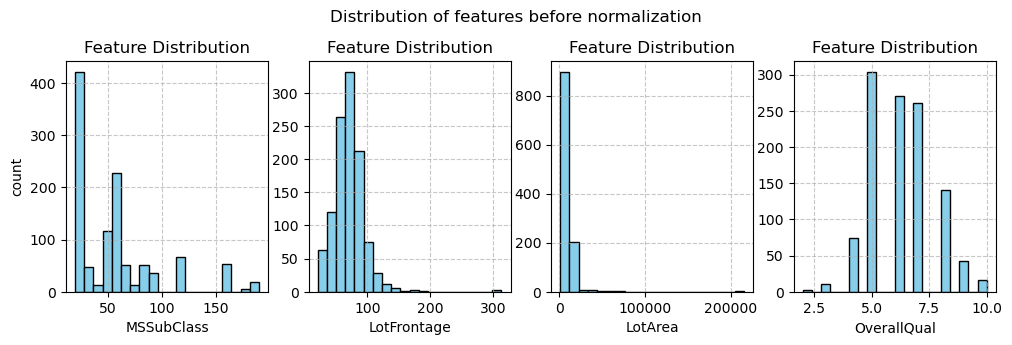

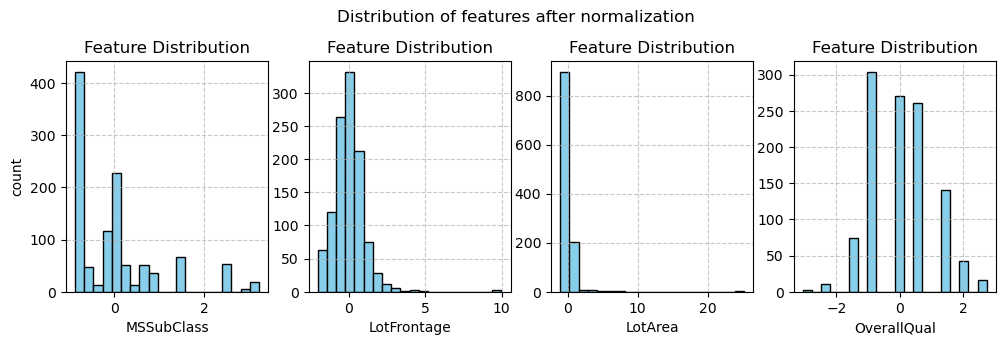

In [11]:
# Visualization of normalization (Not necessary)

def norm_plot(ax, data, bins=20):
    """
    Plots a histogram of the provided data on the given axis.
    
    Parameters:
    - ax: The axis on which to plot the histogram.
    - data: The data array for the feature to be plotted.
    - bins: The number of bins for the histogram. Default is 20.
    """
    ax.hist(data, bins=bins, color='skyblue', edgecolor='black')
    ax.set_title("Feature Distribution")
    ax.grid(True, linestyle='--', alpha=0.7)

fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],x_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("Distribution of features before normalization", y = 1.05)
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("Distribution of features after normalization", y = 1.05)

plt.show()

In [17]:
# Run Gradient Descent.

# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 20000 # Feel free to reduce this number if this is a bit slow
alpha = 5.0e-4
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_norm.shape


Iteration    0: Cost 20611384018.74   
Iteration 2000: Cost 3047540919.22   
Iteration 4000: Cost 1001164728.02   
Iteration 6000: Cost 715416066.72   
Iteration 8000: Cost 671659167.06   
Iteration 10000: Cost 662795453.45   
Iteration 12000: Cost 659843652.40   
Iteration 14000: Cost 658367110.02   
Iteration 16000: Cost 657483789.18   
Iteration 18000: Cost 656916519.26   
b,w found by gradient descent: 185497.75,[-8011.41949503 -2554.88144257  4371.01684486 25300.23441283
  4971.24485624  7414.6478549   3530.17191891  6203.30658114
  4930.42056713   138.71580287 -1017.24755316  4203.24404008
  7060.34994443  8485.56937076   249.84729751 12331.62047256
  4557.03199214   566.25084138  4001.4751966    264.02161654
 -7473.23854297 -4736.50310288  8860.92989084  3198.91077193
  -412.32382937  9937.32513012  2198.63407278  2656.09106672
  -277.77367228   265.29134584  1002.93366631  3310.6169966
 -2516.37594624  -682.08787893  -527.42969216  -384.33861248] 


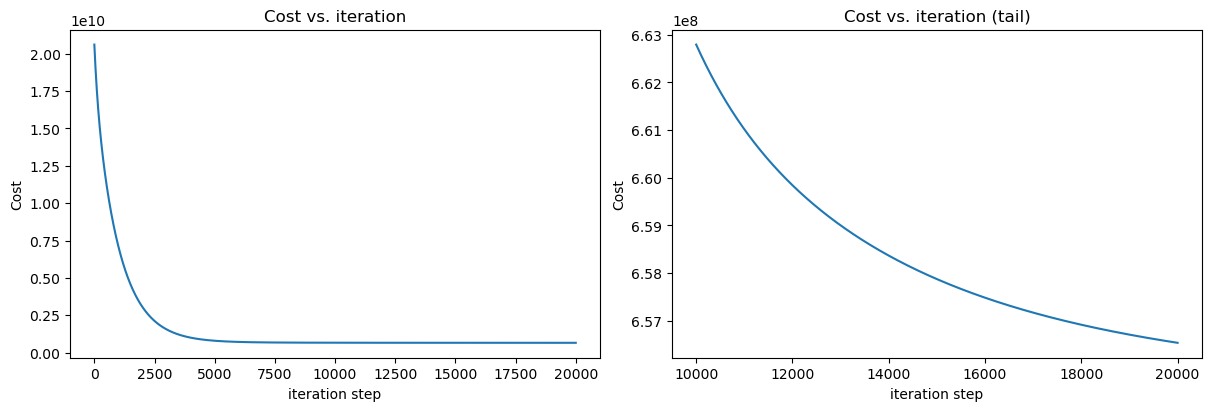

In [19]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(10000 + np.arange(len(J_hist[10000:])), J_hist[10000:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [21]:
# Predictions vs Real Values

#for i in range(m):
    #print(f"prediction: {np.dot(X_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

### Question 1

The data path to the test data set is: data_path = "./kaggle/test.csv"

We can use that data to make predictions (it does not include the SalePrice variable).

- Step 1) Download the data set and select the relevant rows (only int and float)
- Step 2) Normalise your input data
- Step 3) Take the dot product of the input features and the weights to obtain predictions
- Step 4) This can be your first Kaggle submission!


### Question 2

Explore solving this problem using OLS. I have added one of Yusuf's lectures (last year), that covered this topic. Below is an example. Can you solve it using Yusuf's method though?

In [15]:
# Applied approach using OLS (See Yusuf's Material for more derail on that)

import statsmodels.api as sm

# Add a constant to X_train for the intercept
X_b = sm.add_constant(X_norm)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_b).fit()

# Print the summary of the regression
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     135.7
Date:                Thu, 07 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:14:41   Log-Likelihood:                -13358.
No. Observations:                1121   AIC:                         2.679e+04
Df Residuals:                    1086   BIC:                         2.696e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+05   1098.728    168.837      0.0